In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from recognize_word import *

In [2]:
path = 'word-images/word2.png'
word = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

In [3]:
kernel = np.ones((5,5),np.uint8)
_, word = cv2.threshold(word,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
word = 255 - word
#word = cv2.morphologyEx(word, cv2.MORPH_OPEN, kernel)
#word = cv2.erode(word,kernel,iterations = 1)
word = 255 - word

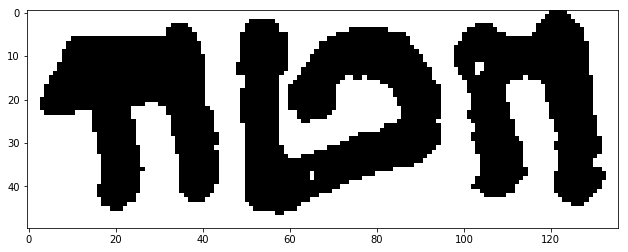

In [4]:
plt.figure(figsize = (500,4))
plt.imshow(word, cmap='gray', aspect = 1)
plt.show()

In [5]:
recognition = recognize_word(word)
print("The best matching word is:", recognition)

3 words,  8  possible combinations
The best matching word is: Het_Tet_He


In [6]:
n_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(word, 8, cv2.CV_32S)

In [7]:
n_labels

4

In [8]:
stats = stats[stats[:,0].argsort()]
stats = stats[1:]
stats

array([[   3,    0,  130,   47, 3149],
       [  65,   37,    1,    2,    2],
       [ 103,   12,    2,    3,    5]], dtype=int32)

In [9]:
idx = 1
char = word[stats[idx][1]:stats[idx][1]+stats[idx][3], stats[idx][0]:stats[idx][0]+stats[idx][2]]
ch_height, ch_width = char.shape
#padding = np.zeros((char.shape[0], char.shape[1]))
#print(padding.shape)
#print(char.shape)
#char = np.concatenate((padding,char), axis = 1)
#char = np.concatenate((char,padding), axis = 1)
#char = char.astype(np.uint8)

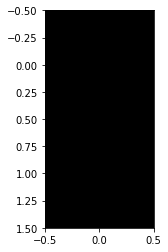

In [10]:
plt.figure(figsize = (500,4))
plt.imshow(char, cmap='gray', aspect = 1)
plt.show()

In [11]:
#template = cv2.imread('templates/he.png', cv2.IMREAD_GRAYSCALE)
#_, template = cv2.threshold(template,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
#template = 255 - template
#template = cv2.resize(template, (ch_width, ch_height))
#plt.figure(figsize = (500,4))
#plt.imshow(template, cmap='gray', aspect = 1)
#plt.show()

In [12]:
#recognize_character(char)